In [3]:
import torch.cuda
import sys

sys.path.append('..')
SEED=1

from src.henry.mnist_vae_pure import VariationalAutoencoder
import torchvision
import torchvision.datasets as datasets
import pickle
from matplotlib import pyplot as plt
import numpy as np
from utils import * 
from WeightsModification import * 
from federated_pure import federate




In [4]:
class FakeArgs:
    def __init__(self):
        self.seed=1
        self.epochs = 1
        self.dataset = "mnist"
        self.num_users=5
        self.iid = 2
        self.dirichlet = 0.9
        self.local_ep=1
        self.local_bs=128
        self.beta=10.0
    

In [5]:
# vae, ovr_losses, mse_losses, kl_losses = vae.train_model(dataset_train,16,10)
# print(mse_losses)
# print(kl_losses)
# 46 -> 34
res = federate(FakeArgs())
res.serialise("base_no_beta",FakeArgs())





RuntimeError: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero.

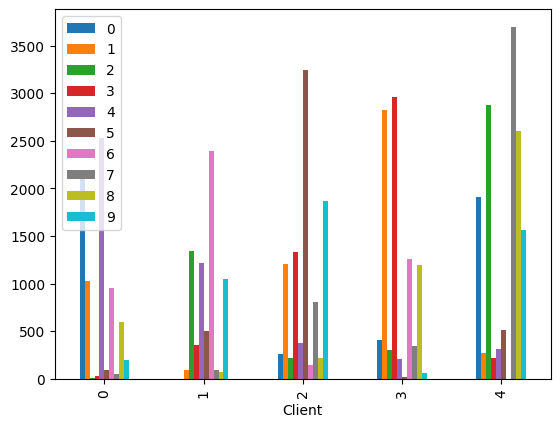

In [5]:
ClientDatasetManager.plot_dataset_splits(res.client_datasets)


In [12]:
res.global_model = res.global_model.to('cuda')

In [13]:
def plot_reconstructed(autoencoder, r0=(-5, 10), r1=(-10, 5), n=12):
    w = 28
    img = np.zeros((n*w, n*w))
    for i, y in enumerate(np.linspace(*r1, n)):
        for j, x in enumerate(np.linspace(*r0, n)):
            z = torch.Tensor([[x, y]]).to('cuda')
            x_hat = autoencoder.decoder(z)
            x_hat = x_hat.reshape(28, 28).to('cpu').detach().numpy()
            img[(n-1-i)*w:(n-1-i+1)*w, j*w:(j+1)*w] = x_hat
    plt.imshow(img, extent=[*r0, *r1])

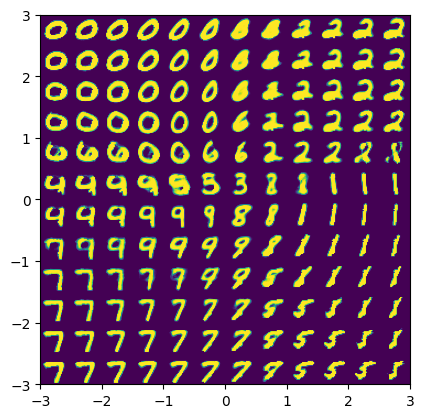

In [14]:
plot_reconstructed(res.global_model, r0=(-3, 3), r1=(-3, 3))


In [6]:
trial_weights = calculate_new_weights(res.global_model.encoder, res.client_datasets, 1.0)


In [8]:
print(f"Original Weights: {calculate_relative_dataset_sizes(res.client_datasets)}")
print(f"New Weights: {trial_weights}")

[0.10889516429725515, 0.4859514304526405, 0.24824828143716982, 0.11612663442360399, 0.040778489389330416]


[0.15853404450370864,
 0.1484915409617468,
 0.20193349445787148,
 0.1999333277773148,
 0.2911075922993583]

In [7]:
second_res = federate(FakeArgs(), trial_weights, res.client_datasets)
second_res.serialise("point_one",FakeArgs())


  0%|          | 0/10 [00:00<?, ?it/s]


 | Global Training Round : 1 |

Training user 0 in round 1
Finished local epoch 1 out of 10, average loss across batches: 561.5249032413258
Finished local epoch 2 out of 10, average loss across batches: 532.796731772543
Finished local epoch 3 out of 10, average loss across batches: 527.0688622739135
Finished local epoch 4 out of 10, average loss across batches: 523.0254424279477
Finished local epoch 5 out of 10, average loss across batches: 520.4095154129157
Finished local epoch 6 out of 10, average loss across batches: 517.7895298164432
Finished local epoch 7 out of 10, average loss across batches: 516.2712720983169
Finished local epoch 8 out of 10, average loss across batches: 514.660308421159
Finished local epoch 9 out of 10, average loss across batches: 513.7258387974331
Finished local epoch 10 out of 10, average loss across batches: 512.9124126274045
Global Validation user 0 in round 1 totalL: 515.258125084673 mseL: 509.20868365738306 klL: 6.049441408622409
Training user 1 in rou

 10%|█         | 1/10 [03:18<29:45, 198.38s/it]

TEST LOSS AT GLOBAL ROUND 1 totalL: 642.0648589111328

 | Global Training Round : 2 |

Training user 0 in round 2
Finished local epoch 1 out of 10, average loss across batches: 521.5397559414391
Finished local epoch 2 out of 10, average loss across batches: 509.410961375517
Finished local epoch 3 out of 10, average loss across batches: 504.2709140296744
Finished local epoch 4 out of 10, average loss across batches: 502.3114719230588
Finished local epoch 5 out of 10, average loss across batches: 500.4183232283392
Finished local epoch 6 out of 10, average loss across batches: 499.21244706225997
Finished local epoch 7 out of 10, average loss across batches: 498.63983112623714
Finished local epoch 8 out of 10, average loss across batches: 498.17756207249744
Finished local epoch 9 out of 10, average loss across batches: 496.4965273432371
Finished local epoch 10 out of 10, average loss across batches: 495.8708558924058
Global Validation user 0 in round 2 totalL: 498.8400253881233 mseL: 492.1

 20%|██        | 2/10 [06:33<26:13, 196.74s/it]

TEST LOSS AT GLOBAL ROUND 2 totalL: 540.2170431152343

 | Global Training Round : 3 |

Training user 0 in round 3
Finished local epoch 1 out of 10, average loss across batches: 513.4322623565417
Finished local epoch 2 out of 10, average loss across batches: 502.51594347913726
Finished local epoch 3 out of 10, average loss across batches: 499.51829685884366
Finished local epoch 4 out of 10, average loss across batches: 499.238001558961
Finished local epoch 5 out of 10, average loss across batches: 497.3033690572787
Finished local epoch 6 out of 10, average loss across batches: 496.47705975700825
Finished local epoch 7 out of 10, average loss across batches: 495.7183129446847
Finished local epoch 8 out of 10, average loss across batches: 495.4090391527705
Finished local epoch 9 out of 10, average loss across batches: 494.7901351672261
Finished local epoch 10 out of 10, average loss across batches: 493.9743787300687
Global Validation user 0 in round 3 totalL: 496.57415289585674 mseL: 489.

 30%|███       | 3/10 [09:41<22:29, 192.74s/it]

TEST LOSS AT GLOBAL ROUND 3 totalL: 530.2417845535279

 | Global Training Round : 4 |

Training user 0 in round 4
Finished local epoch 1 out of 10, average loss across batches: 509.23733773752423
Finished local epoch 2 out of 10, average loss across batches: 500.8423111218364
Finished local epoch 3 out of 10, average loss across batches: 497.51472450705137
Finished local epoch 4 out of 10, average loss across batches: 496.27456366915663
Finished local epoch 5 out of 10, average loss across batches: 495.53368836090345
Finished local epoch 6 out of 10, average loss across batches: 494.24494972549564
Finished local epoch 7 out of 10, average loss across batches: 494.11566364063935
Finished local epoch 8 out of 10, average loss across batches: 493.44798326893016
Finished local epoch 9 out of 10, average loss across batches: 492.42252433199843
Finished local epoch 10 out of 10, average loss across batches: 492.11517981521223
Global Validation user 0 in round 4 totalL: 496.58959673081205 mse

 40%|████      | 4/10 [12:46<18:56, 189.47s/it]

TEST LOSS AT GLOBAL ROUND 4 totalL: 524.5073947570801

 | Global Training Round : 5 |

Training user 0 in round 5
Finished local epoch 1 out of 10, average loss across batches: 506.01920975757247
Finished local epoch 2 out of 10, average loss across batches: 498.69630166061785
Finished local epoch 3 out of 10, average loss across batches: 496.3345296843713
Finished local epoch 4 out of 10, average loss across batches: 495.27697023023075
Finished local epoch 5 out of 10, average loss across batches: 494.4810376527931
Finished local epoch 6 out of 10, average loss across batches: 494.29144114005464
Finished local epoch 7 out of 10, average loss across batches: 493.0746049961122
Finished local epoch 8 out of 10, average loss across batches: 492.96311989151127
Finished local epoch 9 out of 10, average loss across batches: 491.6825884971298
Finished local epoch 10 out of 10, average loss across batches: 491.34810180022936
Global Validation user 0 in round 5 totalL: 493.6720739656289 mseL: 4

 50%|█████     | 5/10 [15:48<15:34, 186.91s/it]

TEST LOSS AT GLOBAL ROUND 5 totalL: 522.7231341339111

 | Global Training Round : 6 |

Training user 0 in round 6
Finished local epoch 1 out of 10, average loss across batches: 504.94063984846866
Finished local epoch 2 out of 10, average loss across batches: 498.21950117479855
Finished local epoch 3 out of 10, average loss across batches: 496.3037436349051
Finished local epoch 4 out of 10, average loss across batches: 494.77819894742566
Finished local epoch 5 out of 10, average loss across batches: 493.91421883847534
Finished local epoch 6 out of 10, average loss across batches: 492.64346249364
Finished local epoch 7 out of 10, average loss across batches: 491.9304475223317
Finished local epoch 8 out of 10, average loss across batches: 492.16926190031677
Finished local epoch 9 out of 10, average loss across batches: 491.81611065904633
Finished local epoch 10 out of 10, average loss across batches: 491.33950654999546
Global Validation user 0 in round 6 totalL: 494.118985174583 mseL: 487

 60%|██████    | 6/10 [18:50<12:20, 185.04s/it]

TEST LOSS AT GLOBAL ROUND 6 totalL: 523.5524287094116

 | Global Training Round : 7 |

Training user 0 in round 7
Finished local epoch 1 out of 10, average loss across batches: 503.3761243419487
Finished local epoch 2 out of 10, average loss across batches: 496.284713152076
Finished local epoch 3 out of 10, average loss across batches: 494.3815654466132
Finished local epoch 4 out of 10, average loss across batches: 493.3816270587825
Finished local epoch 5 out of 10, average loss across batches: 492.5749162305303
Finished local epoch 6 out of 10, average loss across batches: 492.08272802529217
Finished local epoch 7 out of 10, average loss across batches: 491.0135172034512
Finished local epoch 8 out of 10, average loss across batches: 491.05541841522984
Finished local epoch 9 out of 10, average loss across batches: 490.64402014467896
Finished local epoch 10 out of 10, average loss across batches: 489.85492994805344
Global Validation user 0 in round 7 totalL: 493.78946450454464 mseL: 486

 70%|███████   | 7/10 [21:53<09:13, 184.48s/it]

TEST LOSS AT GLOBAL ROUND 7 totalL: 521.6367024459839

 | Global Training Round : 8 |

Training user 0 in round 8
Finished local epoch 1 out of 10, average loss across batches: 503.2862950172745
Finished local epoch 2 out of 10, average loss across batches: 496.3036145763237
Finished local epoch 3 out of 10, average loss across batches: 494.49177169799805
Finished local epoch 4 out of 10, average loss across batches: 493.16601543266233
Finished local epoch 5 out of 10, average loss across batches: 492.5670832145114
Finished local epoch 6 out of 10, average loss across batches: 492.08620728564864
Finished local epoch 7 out of 10, average loss across batches: 491.25417385582165
Finished local epoch 8 out of 10, average loss across batches: 490.7301492450618
Finished local epoch 9 out of 10, average loss across batches: 490.168277227578
Finished local epoch 10 out of 10, average loss across batches: 490.16374562367673
Global Validation user 0 in round 8 totalL: 495.0056708571915 mseL: 488

 80%|████████  | 8/10 [24:56<06:07, 184.00s/it]

TEST LOSS AT GLOBAL ROUND 8 totalL: 520.1128744918823

 | Global Training Round : 9 |

Training user 0 in round 9
Finished local epoch 1 out of 10, average loss across batches: 501.7525261951094
Finished local epoch 2 out of 10, average loss across batches: 495.691216925613
Finished local epoch 3 out of 10, average loss across batches: 493.63101189877807
Finished local epoch 4 out of 10, average loss across batches: 492.663863430504
Finished local epoch 5 out of 10, average loss across batches: 492.85884575082474
Finished local epoch 6 out of 10, average loss across batches: 491.448597787809
Finished local epoch 7 out of 10, average loss across batches: 490.8437007615546
Finished local epoch 8 out of 10, average loss across batches: 490.6070716922023
Finished local epoch 9 out of 10, average loss across batches: 490.2283597353126
Finished local epoch 10 out of 10, average loss across batches: 489.86489005850143
Global Validation user 0 in round 9 totalL: 493.7381047676315 mseL: 486.500

 90%|█████████ | 9/10 [28:02<03:04, 184.78s/it]

TEST LOSS AT GLOBAL ROUND 9 totalL: 518.3758788162231

 | Global Training Round : 10 |

Training user 0 in round 10
Finished local epoch 1 out of 10, average loss across batches: 502.0185338509183
Finished local epoch 2 out of 10, average loss across batches: 495.6629903777307
Finished local epoch 3 out of 10, average loss across batches: 494.17584574723446
Finished local epoch 4 out of 10, average loss across batches: 493.02127088017824
Finished local epoch 5 out of 10, average loss across batches: 492.36791274126836
Finished local epoch 6 out of 10, average loss across batches: 491.0067037694594
Finished local epoch 7 out of 10, average loss across batches: 490.48868185732545
Finished local epoch 8 out of 10, average loss across batches: 490.1931740255917
Finished local epoch 9 out of 10, average loss across batches: 490.03252109559645
Finished local epoch 10 out of 10, average loss across batches: 489.79912278632156
Global Validation user 0 in round 10 totalL: 494.437124848679 mseL:

100%|██████████| 10/10 [31:09<00:00, 186.91s/it]

TEST LOSS AT GLOBAL ROUND 10 totalL: 517.2705299789428


In [19]:

t1_total, t1_mse, t1_kl, v1_total, v1_mse, v1_kl = ClientLossManager.process_data(res.all_losses)

In [22]:
t1_mse


[515.1808756643665, 495.0719893766228, 489.8461961093384]

In [8]:
list(zip(trial_weights, calculate_relative_dataset_sizes(res.client_datasets)))

[(0.09478983721025222, 0.0842171059485363),
 (0.10446058685343546, 0.07446609021773101),
 (0.1031778055495649, 0.11436607979997916),
 (0.10588977067076784, 0.16762162725283883),
 (0.09043595898624585, 0.0612355453693093),
 (0.09799138426529364, 0.14372330451088655),
 (0.09973323003816591, 0.1650171892905511),
 (0.10453931111564084, 0.06292322116887175),
 (0.09736302068937215, 0.09707261173038859),
 (0.10161909462126119, 0.029357224710907386)]